## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## loading insurance dataset

In [ ]:
health_insurance=pd.read_csv("insurance.csv")

In [ ]:
health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Dropping Duplicate Columns

In [ ]:
#health_insurance.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Printing First Five Rows of Table

In [ ]:
health_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Printing Last Five Rows of Column

In [ ]:
health_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Printing Detailed Info of Table

In [ ]:
health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Analysis

### All Statistical Measures of Table

In [ ]:
health_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Numerical features

In [ ]:
[features for features in health_insurance.dtypes[health_insurance.dtypes !='object'].index]

['age', 'bmi', 'children', 'charges']

In [ ]:
num_features=health_insurance.dtypes[health_insurance.dtypes !='object'].index

In [ ]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(num_features)

4

In [ ]:
health_insurance[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## categorical features

In [ ]:
cat_features=health_insurance.dtypes[health_insurance.dtypes =='object'].index

In [ ]:
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(cat_features)

3

In [ ]:
health_insurance[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Printing No of Rows and Columns of Table

In [ ]:
health_insurance.shape

(1338, 7)

## Number of Columns in a Table

In [ ]:
health_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Unique Labels of Table

In [ ]:
health_insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Checking UNIQUE Lables For Catagorical Features

### Sex

In [ ]:
health_insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
health_insurance["sex"].unique()

array(['female', 'male'], dtype=object)

### Smoker

In [ ]:
health_insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
health_insurance["smoker"].unique()

array(['yes', 'no'], dtype=object)

### Children

In [ ]:
health_insurance["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
health_insurance["children"].unique()

array([0, 1, 3, 2, 5, 4])

### Region

In [ ]:
health_insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
health_insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Charges

In [ ]:
health_insurance["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Checking Number of Null Values in a Table

In [ ]:
health_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Correlation Values of All Columns

In [ ]:
health_insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Data Visualization

### 1) HEATMAP

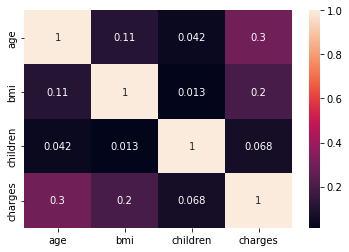

In [ ]:

sns.heatmap(health_insurance.corr(),annot=True)
plt.show()

### 2) PAIR PLOT

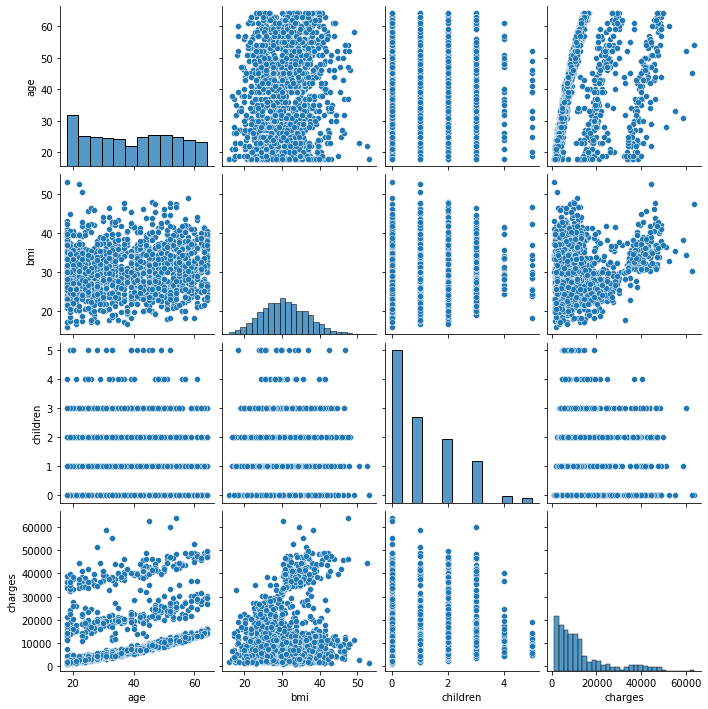

In [ ]:
sns.pairplot(health_insurance)
plt.show()

### 3) HISTOGRAMS

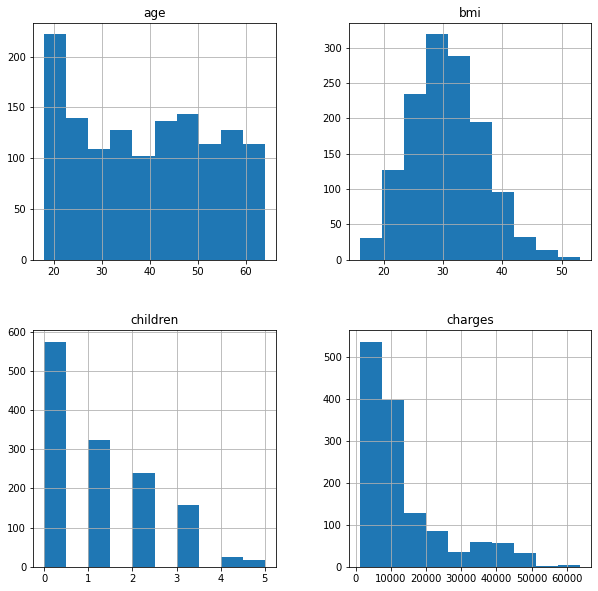

In [ ]:
health_insurance.hist(bins=10,figsize= (10,10))
plt.show()

### 4) Countplot

**Distribution of AGE**

<Figure size 720x720 with 0 Axes>

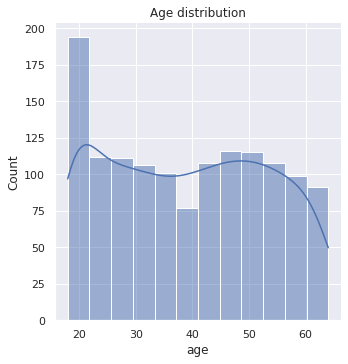

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.displot(health_insurance["age"],kde = True, color = 'b')
plt.title("Age distribution")
plt.show()

**(ii) Distribution of gender value**

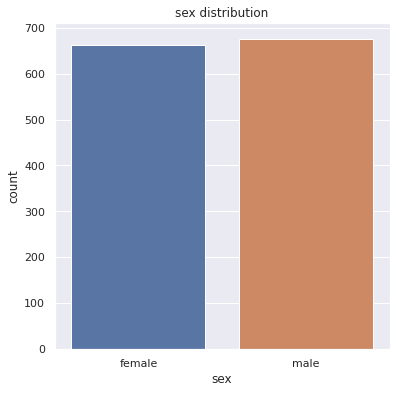

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=health_insurance)
plt.title("sex distribution")
plt.show()

 **(iii) BMI distribution**

<Figure size 720x720 with 0 Axes>

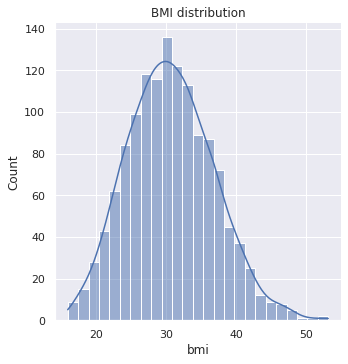

In [ ]:
sns.set()
plt.figure(figsize=(10,10))
sns.displot(health_insurance["bmi"],kde = True, color = 'b')
plt.title("BMI distribution")
plt.show()

 BMI range 18.5 to 24.9

 **(iv) Children Distribution**

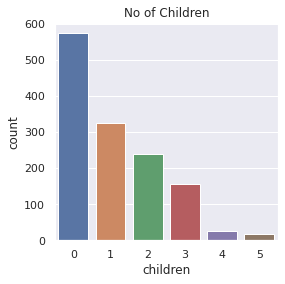

In [ ]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x="children",data=health_insurance)
plt.title("No of Children")
plt.show()

 **(v) smoker**

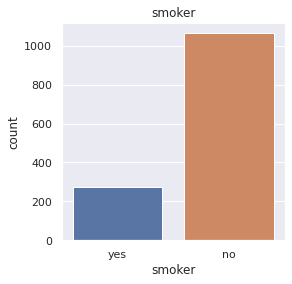

In [ ]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x="smoker",data=health_insurance)
plt.title("smoker")
plt.show()

**(vi) Region**

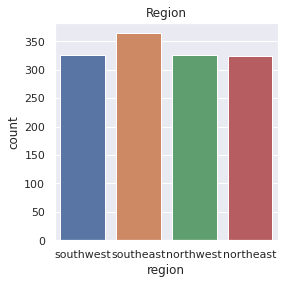

In [ ]:
sns.set()
plt.figure(figsize=(4,4))
sns.countplot(x="region",data=health_insurance)
plt.title("Region")
plt.show()

**(vii) Charges**

<Figure size 288x288 with 0 Axes>

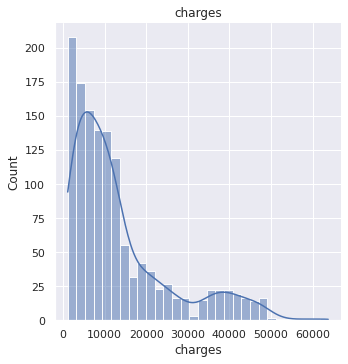

In [ ]:
sns.set()
plt.figure(figsize=(4,4))
sns.displot(health_insurance["charges"],kde = True, color = 'b')
plt.title("charges")
plt.show()

### Categorical Values
**Sex**<br>
**Region**<br>
**Smoker**

## Data Pre-Processing
**Encoding the Catagorical Feature(Change into Numerical Value)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(health_insurance["sex"])

LabelEncoder()

In [ ]:
le.fit_transform(health_insurance["sex"])

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
category_cols=["sex","region","smoker"]
for cols in category_cols:
    le=LabelEncoder()
    health_insurance[cols]=le.fit_transform(health_insurance[cols])

In [ ]:
health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**SEX  => Female = 0 , Male = 1<br> SMOKER  => No = 0 , Yes = 1<br>REGION => Southwest = 3, Southeast = 2 , Northwest = 1 , Northeast = 0**

In [ ]:
health_insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


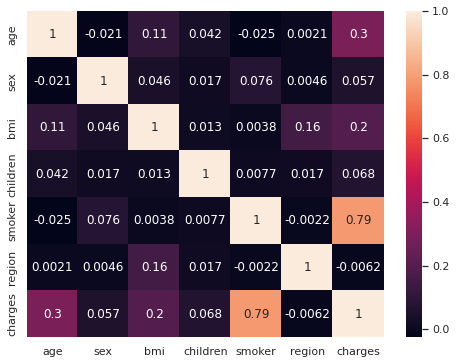

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(health_insurance.corr(),annot=True)
plt.show()

## Splitting The Data Into x and y

In [ ]:
x=health_insurance.drop("charges",axis=1)
y=health_insurance["charges"]

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Test and Train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)

In [ ]:
x.shape,x_train.shape,x_test.shape

((1338, 6), (1070, 6), (268, 6))

In [ ]:
x_train

,age,sex,bmi,children,smoker,region
621,37,1,34.100,4,1,3
194,18,1,34.430,0,0,2
240,23,0,36.670,2,1,0
1168,32,1,35.200,2,0,3
1192,58,0,32.395,1,0,0
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [ ]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [ ]:
x_test

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1
...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1
726,41,1,28.405,1,0,1
1132,57,1,40.280,0,0,0
725,30,0,39.050,3,1,2


In [ ]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

## Importing Libraries

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Model evaluation

**DIFFERENT MODELS TO SOLVE THIS PROBLEM ( LINEAR , RANDOMFOREST )**

### 1)  Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
model=reg.fit(x_train,y_train)

In [ ]:
model

LinearRegression()

In [ ]:
model.coef_

array([  253.99185244,   -24.32455098,   328.40261701,   443.72929547,
       23568.87948381,  -288.50857254])

In [ ]:
model.intercept_

-11661.98390882441

## Prediction on training data

In [ ]:
train_pred_reg=model.predict(x_train)

In [ ]:
train_pred_reg

array([33388.19026849,  3615.42984257, 30678.69073769, ...,
        6132.68612727,  4519.17314626,  2373.39921419])

In [ ]:
mean_absolute_error(y_train, train_pred_reg)

4235.3838760320905

In [ ]:
mean_squared_error(y_train, train_pred_reg)

37729580.5098492

In [ ]:
np.sqrt(mean_squared_error(y_train,train_pred_reg))

6142.440924408569

In [ ]:
r2_score(y_train, train_pred_reg)

0.7368306228430944

## Prediction on testing data

In [ ]:
test_pred_reg=model.predict(x_test)

In [ ]:
reg_err=mean_absolute_error(y_test, test_pred_reg)
reg_err

3930.3332739011403

In [ ]:
reg_squ=mean_squared_error(y_test, test_pred_reg)
reg_squ

31845929.13415943

In [ ]:
reg_sqrt=np.sqrt(mean_squared_error(y_test,test_pred_reg))
reg_sqrt

5643.219748880902

In [ ]:
reg_r2=r2_score(y_test, test_pred_reg)
reg_r2

0.7998747145449959

## 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor()

In [ ]:
model_ran=ran.fit(x_train,y_train)

In [ ]:
model_ran

RandomForestRegressor()

## Prediction on training data

In [ ]:
train_pred_ran=model_ran.predict(x_train)

In [ ]:
train_pred_ran

array([39945.1942825,  1251.3820485, 38645.3859297, ...,  5545.8711835,
        1804.309745 ,  5920.1774358])

In [ ]:
mean_absolute_error(y_train, train_pred_ran)

1069.1414173823366

In [ ]:
mean_squared_error(y_train, train_pred_ran)

3752689.769271952

In [ ]:
np.sqrt(mean_squared_error(y_train,train_pred_ran))

1937.1860440525459

In [ ]:
r2_score(y_train, train_pred_ran)

0.9738244365323759

## Prediction on testing data

In [ ]:
test_pred_ran=model_ran.predict(x_test)

In [ ]:
ran_err=mean_absolute_error(y_test, test_pred_ran)
ran_err

2635.4563076101676

In [ ]:
ran_squ=mean_squared_error(y_test, test_pred_ran)
ran_squ

19872897.50308762

In [ ]:
ran_sqrt=np.sqrt(mean_squared_error(y_test,test_pred_ran))
ran_sqrt

4457.9028144507165

In [ ]:
ran_r2=r2_score(y_test, test_pred_ran)
ran_r2

0.875115300644268

# Graph of actual prices vs predicted prices using Linear regression

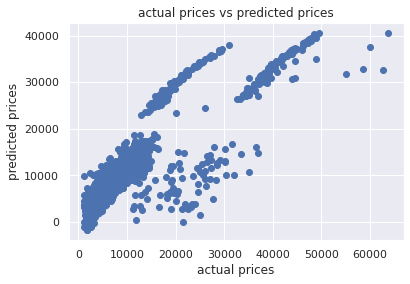

In [ ]:
plt.scatter(y_train,train_pred_reg)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

# Graph of actual prices vs predicted prices using Random Forest

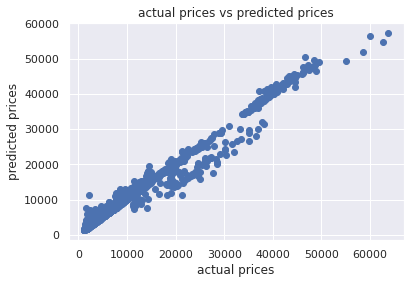

In [ ]:
plt.scatter(y_train,train_pred_ran)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

## Comparision Between 2 Models

In [ ]:
health_insurance1 = pd.DataFrame({'Actual':y_test,'Linear regression':test_pred_reg,'Randomforest':test_pred_ran})

In [ ]:
health_insurance1

,Actual,Linear regression,Randomforest
578,9724.53000,11017.230479,11759.233298
610,8547.69130,9787.530168,9309.487718
569,45702.02235,37994.782118,44645.666687
1034,12950.07120,16122.778407,13092.053261
198,9644.25250,6930.759230,10199.812078
...,...,...,...
1084,15019.76005,14699.098767,16145.551969
726,6664.68595,8210.854549,6603.324282
1132,20709.02034,16019.284542,11757.532255
725,40932.42950,33104.944084,42184.353048


In [ ]:
health_insurance2 = pd.DataFrame({'Error Score':['Absolute','Mean square','Root mean Square','R2 score'],'Linear Regression':[reg_err,reg_squ,reg_sqrt,reg_r2],'Random forest':[ran_err,ran_squ,ran_sqrt,ran_r2]})

In [ ]:
health_insurance2

,Error Score,Linear Regression,Random forest
0,Absolute,3.930333e+03,2.635456e+03
1,Mean square,3.184593e+07,1.987290e+07
2,Root mean Square,5.643220e+03,4.457903e+03
3,R2 score,7.998747e-01,8.751153e-01


SEX => Female = 0 , Male = 1
SMOKER => No = 0 , Yes = 1
REGION => Southwest = 0 , Southeast = 1 , Northwest = 2 , Northeast = 3

## Building Predictive System

**Using The Model For some rows from the Test data set:**

### Example 1

In [ ]:
input_data_1=[31,0,25.74,0,0,2]
input_data_as_array_1=np.asarray(input_data_1)
reshaped_array_1=input_data_as_array_1.reshape(1,-1)

In [ ]:
y_pred_lin_1= model.predict(reshaped_array_1)
y_pred_ran_1= model_ran.predict(reshaped_array_1)

In [ ]:
print("Actual charges value: 3756.6216")
print("Predicted charges value:")
print("Linear model :",y_pred_lin_1)
print("RandomForest model :",y_pred_ran_1)

Actual charges value: 3756.6216
Predicted charges value:
Linear model : [4087.82973351]
RandomForest model : [3779.8974165]


### Example 2

In [ ]:
input_data_2=[37,0,27.74,3,0,1]
input_data_as_array_2=np.asarray(input_data_2)
reshaped_array_2=input_data_as_array_2.reshape(1,-1)

In [ ]:
y_pred_lin_2= model.predict(reshaped_array_2)
y_pred_ran_2= model_ran.predict(reshaped_array_2)

In [ ]:
print("Actual charges value: 7281.5056")
print("Predicted charges value:")
print("Linear model :",y_pred_lin_2)
print("RandomForest model :",y_pred_ran_2)

Actual charges value: 7281.5056
Predicted charges value:
Linear model : [7888.28254112]
RandomForest model : [7039.5991145]


## Using the Model for a New Customer:

In [ ]:
input_data_new=[32,	1	,360,	1	,1,	2]
input_data_as_array_new=np.asarray(input_data_new)
reshaped_array_new=input_data_as_array_new.reshape(1,-1)

In [ ]:
y_pred_lin_new= model.predict(reshaped_array_new)
y_pred_ran1_new= model_ran.predict(reshaped_array_new)

In [ ]:
print("Predicted charges value:")
print("Linear model :",y_pred_lin_new)
print("RandomForest model :",y_pred_ran1_new)

Predicted charges value:
Linear model : [138101.9645747]
RandomForest model : [47109.5231343]


### Saving the Model

In [ ]:
from joblib import dump,load
dump(y_pred_ran1_new,'Final_Majorproject.joblib')

['Final_Majorproject.joblib']